In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig

#caso precise usar pip install cairocffi
#caso precise usar pip install igraph

    x  y  z  w  k
V1  0  1  1  1  1
V2  0  0  1  1  1
V3  1  1  0  0  0
V4  1  1  0  1  1


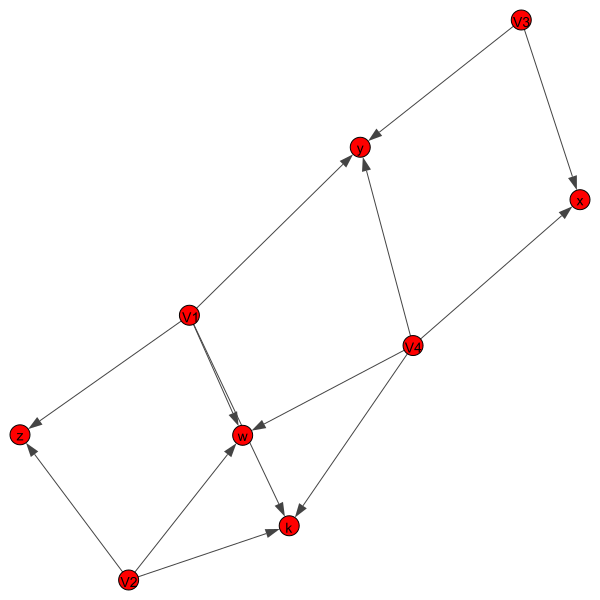

In [2]:
#Matriz Incidência-"mtz_exemplo.txt"
mtz = np.genfromtxt('./mtz_exemplo.txt', dtype=int, delimiter='\t')
linha = ['V1', 'V2', 'V3', 'V4']
coluna = ['x', 'y', 'z', 'w', 'k']
mtz = mtz[mtz != -1]
mtz = mtz.reshape(4, 5)
#print(mtz)



mtz_df = pd.DataFrame(mtz, index=linha, columns=coluna)
print(mtz_df)



graph_inc = nx.DiGraph()
for li in linha:
   for col in coluna:
        if mtz_df.loc[li, col] == 1:
            graph_inc.add_edge(li, col)

Graph_Inc=ig.Graph.from_networkx(graph_inc)
ig.plot(Graph_Inc,vertex_label=graph_inc)






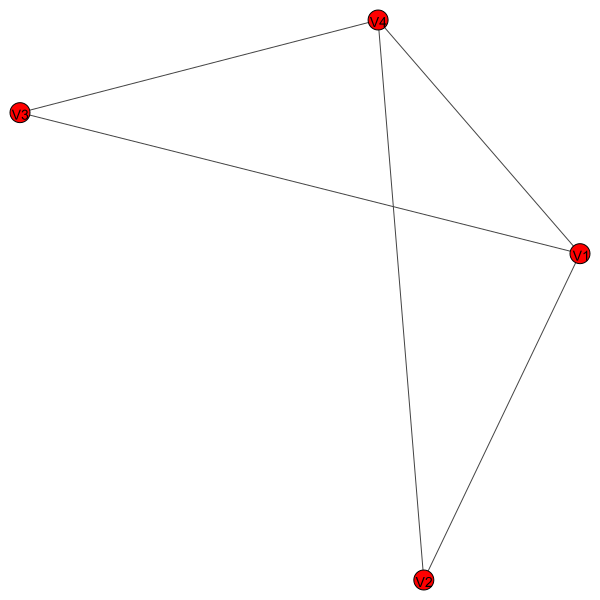

In [3]:
#Matriz Similaridade-"mtz_exemplo"
mtz_T=mtz.transpose()

mtz_sim=np.dot(mtz,mtz_T)
#print(mtz_sim)

graph_sim_mtz=nx.Graph(mtz_sim)
node_labels={0:'V1',1:'V2',2:'V3',3:'V4'}
graph_sim_mtz.remove_edges_from(nx.selfloop_edges(graph_sim_mtz))

Graph_Sim=ig.Graph.from_networkx(graph_sim_mtz)
ig.plot(Graph_Sim,vertex_label=['V1','V2','V3','V4'])



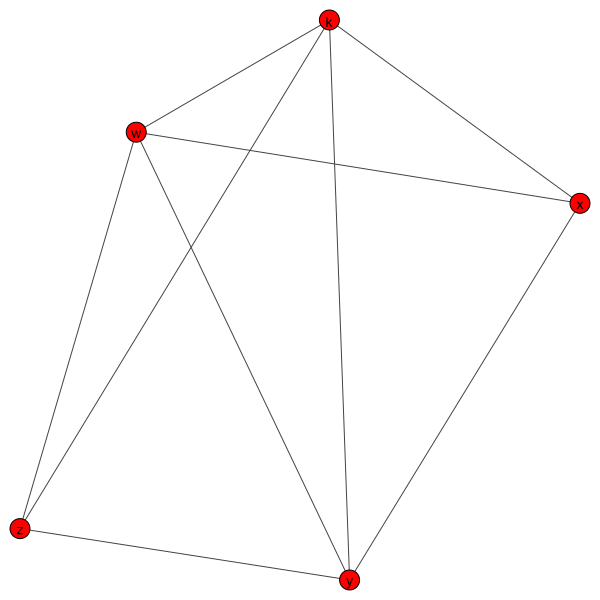

In [4]:
#Matriz Coocorrência-"mtz_exemplo.txt"
mtz_T=mtz.transpose()

mtz_co=np.dot(mtz_T,mtz)
#print(mtz_co)

graph_co=nx.Graph(mtz_co)
node_labels={0:'x',1:'y',2:'z',3:'w',4:'k'}
graph_co.remove_edges_from(nx.selfloop_edges(graph_co))

Graph_Coo=ig.Graph.from_networkx(graph_co)
ig.plot(Graph_Coo,vertex_label=['x','y','z','w','k'])

